In [1]:
import numpy as np
import pandas as pd
import gensim
#from gensim.models import Word2Vec
from preprocessing import *
from IPython.display import Image
###################################
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk


## Function Defination

In [30]:
lemtzer = WordNetLemmatizer()

def lemmatize_stemming(text):
    return lemtzer.lemmatize(text, pos='v')

# Write a function to perform the pre processing steps on the entire dataset
def preprocess(text):
    result=[]
    for token in simple_preprocess(text) :
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

# Train the model. There are two output, the first one is the trained model, the second one is the input dictionary
def trainLDA(df, count = 1, num_topics = 5, alpha = 0.1, passes=2, iterations=50):
    processed_docs  = []
    for doc in df['alltext']:
        processed_docs.append(preprocess(doc))
        
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, alpha = alpha, passes=passes, iterations=iterations)
    lda_model.save('lda_{}.model'.format(count))
    
    return lda_model, dictionary
    

# process the input data for model training.     
def inputPrep(df):
    processed_docs  = []
    for doc in df['alltext']:
        processed_docs.append(preprocess(doc))
        
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    
    return dictionary, bow_corpus

# Print out the pictures of each catergory
def groupPic(df, model, dictionary):
    result_dic = {}
    for i in df['id']:
        bow_vector = dictionary.doc2bow(preprocess(df[df['id'] == i]['alltext'].tolist()[0]))
        groupID = sorted(model[bow_vector], key = lambda tup:tup[1])[-1][0]
#        print(groupID)
        if groupID in result_dic.keys():
            result_dic[groupID].append(i)
        else:
            result_dic[groupID] = [i]
    
    print('The groups are:')
    print(result_dic)
    print('#'* 50)

    for key in result_dic.keys():
        print('#'*50)
        print('group number : {}'.format(key))
        print('#'*50)
        
        for i in result_dic[key]:
            file_name = './product_images/{}.jpg'.format(i)
            display(Image(filename = file_name, width=200, height=200))

## Load Input Data

In [5]:
df_all = pd.read_csv('all.csv', index_col = 0)

## Simple Clean-up

In [6]:
df_all2 = data_cleaning(df_all,removeNa = True, keep_percent = False, rmPunctuation = True, rmNums = True, rmStopWords = True)

## LDA Modeling

### You guys can play around with the number of topics, alpha, passes and iteration number

In [27]:
lda_md2, dict_ = trainLDA(df_all2, count = 1, num_topics = 6, alpha = 0.1, passes=2, iterations=50)

## Show Pictures

### Just try to put some random sampling of the data. DO NOT PUT ALL DATA IN !!!!!!

### You need to have the picture folders in the same directory. (./product_images/)

The groups are:
{5: [4455, 4171, 5939, 4908, 8156, 8573, 3621, 8336, 7920, 9376, 8377, 8844, 4597, 9536, 9589], 3: [202, 8483, 5176, 4780, 6547, 3316, 4812, 2745, 432], 0: [757, 4770, 2054, 4253, 9740, 2566, 2654, 7421, 4701], 4: [1993, 209, 1953, 1867, 1379, 1425, 5296, 10220, 1265], 1: [3324, 3401, 6197, 1408, 4756, 5975], 2: [413, 3221]}
##################################################
##################################################
group number : 5
##################################################


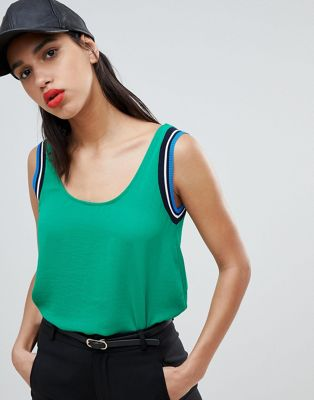

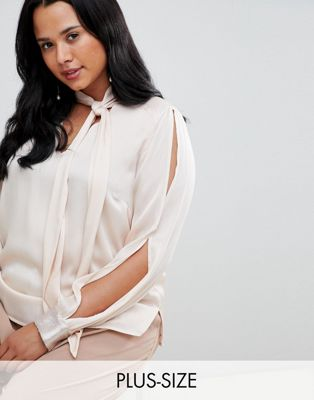

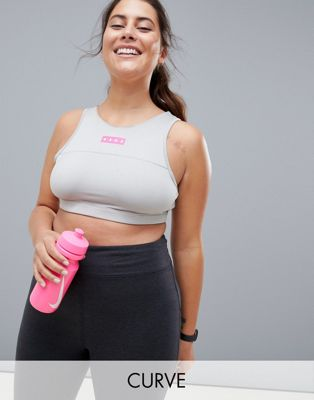

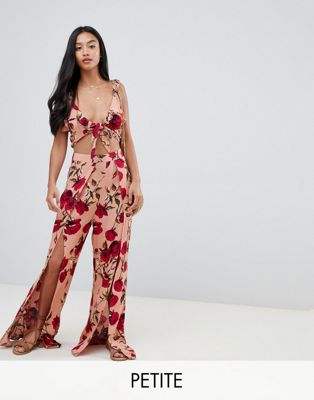

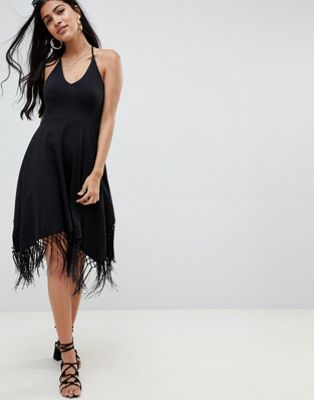

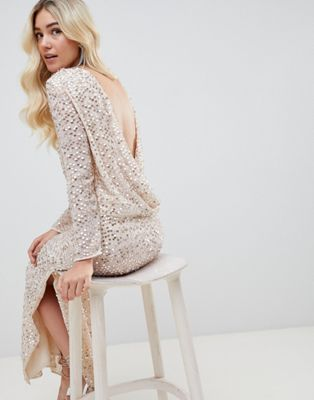

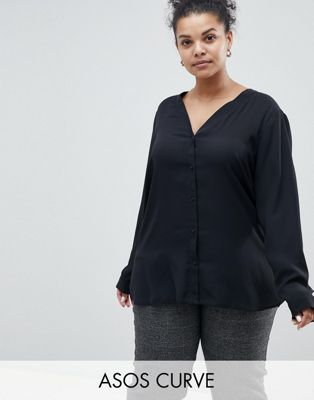

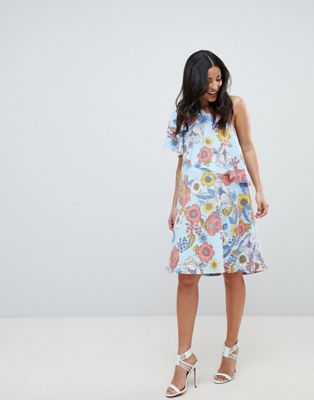

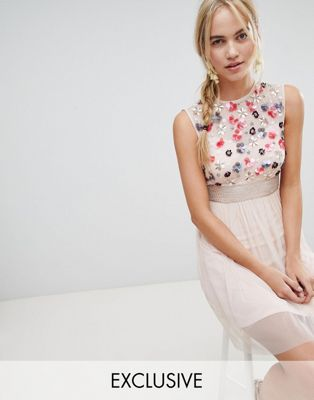

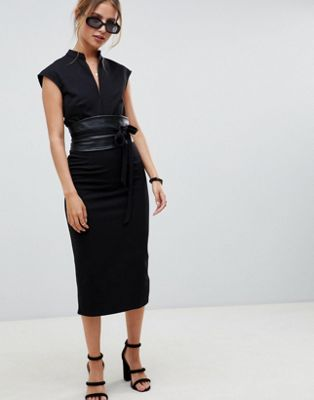

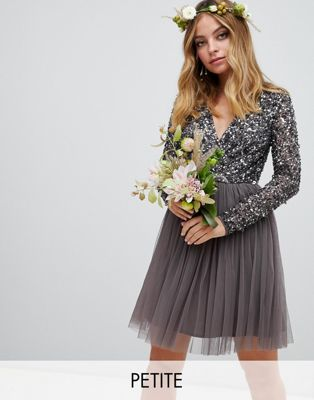

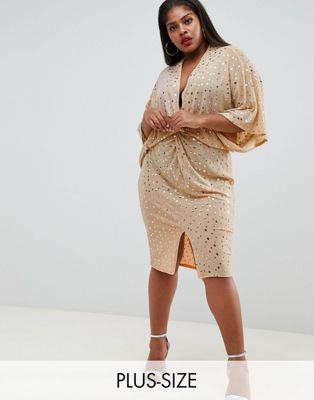

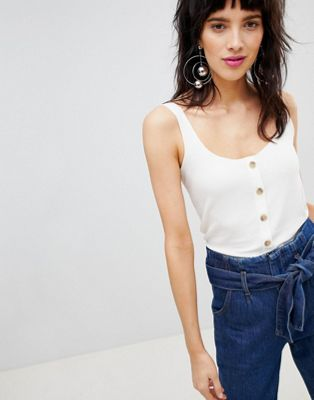

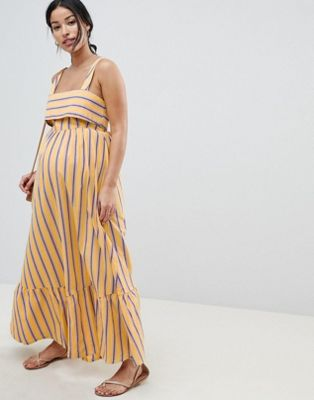

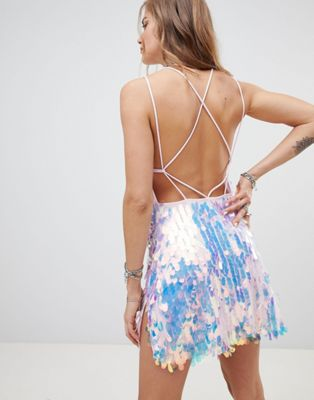

##################################################
group number : 3
##################################################


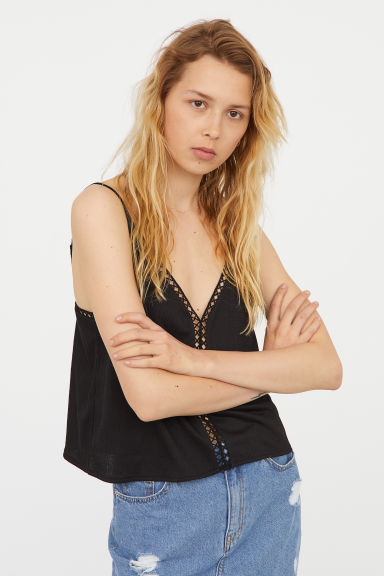

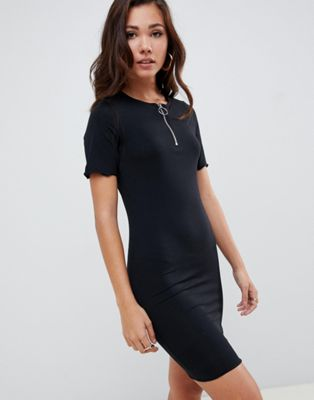

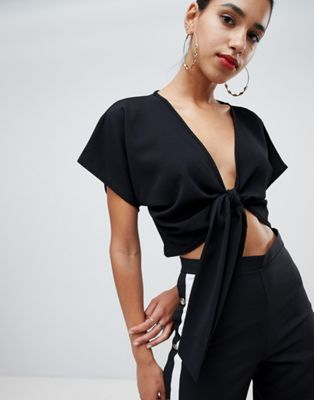

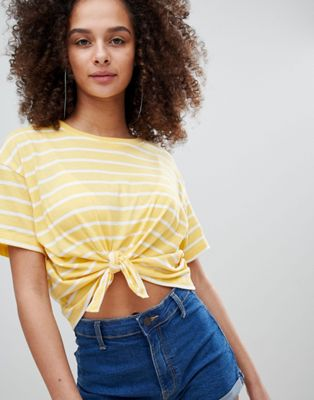

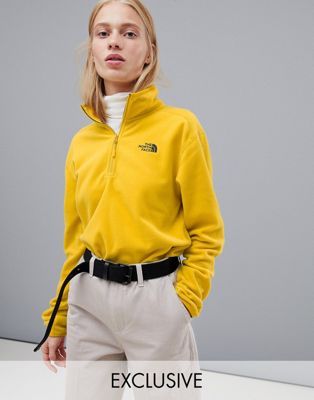

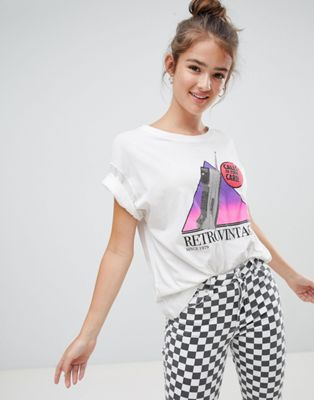

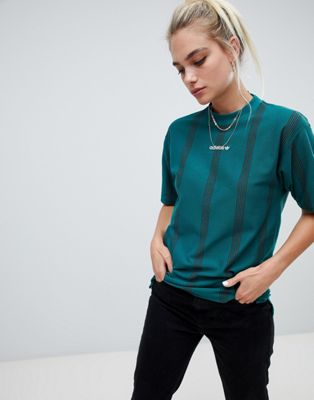

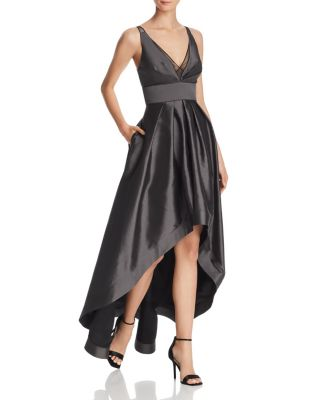

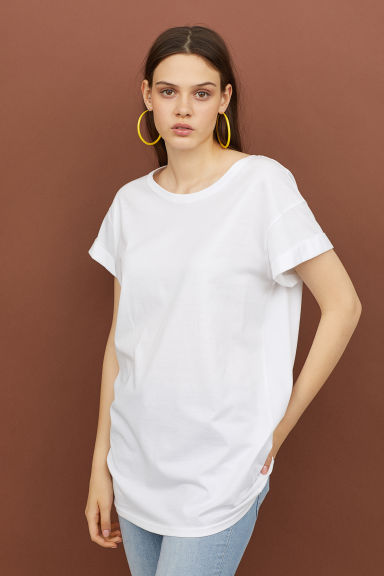

##################################################
group number : 0
##################################################


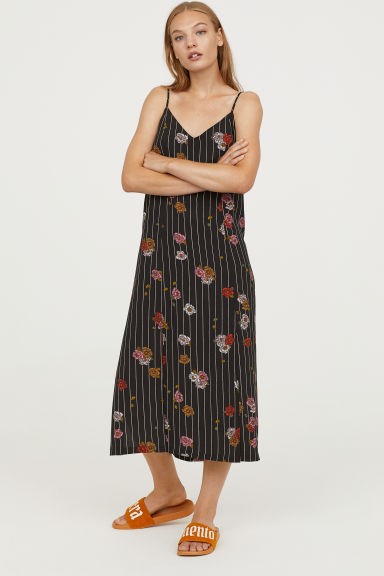

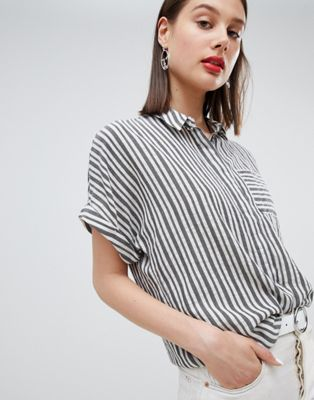

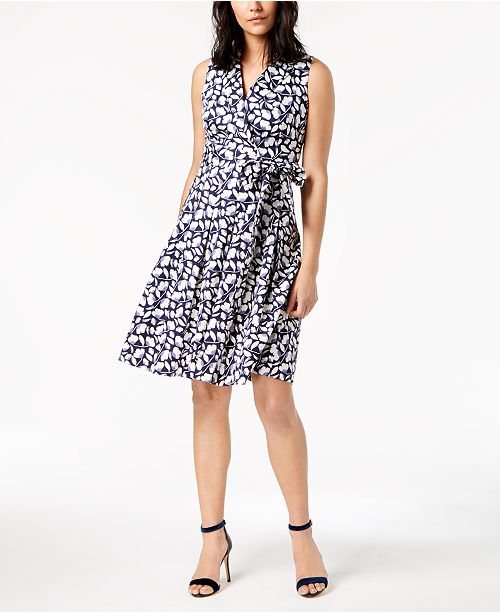

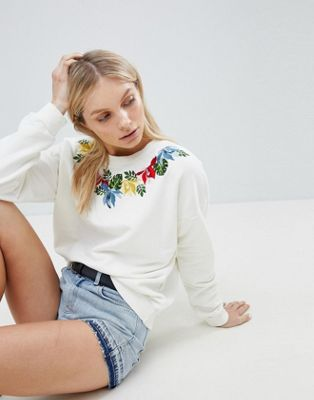

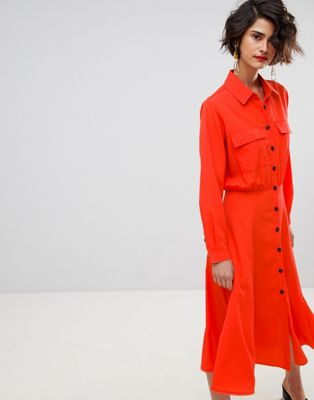

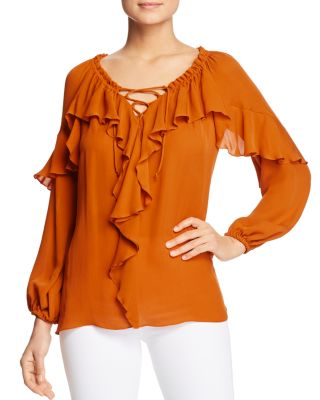

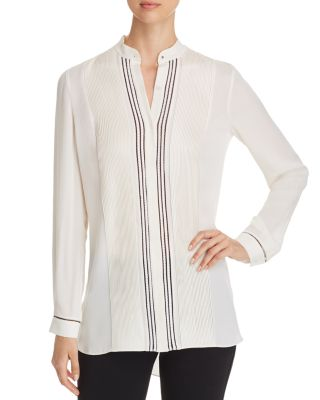

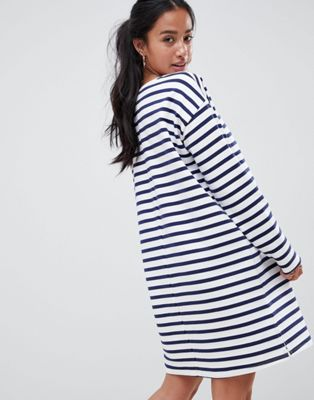

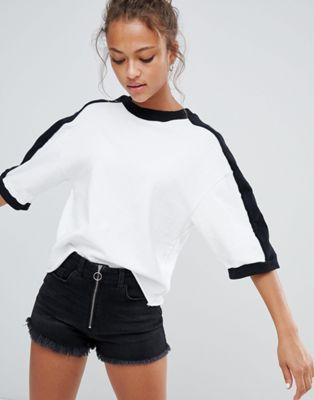

##################################################
group number : 4
##################################################


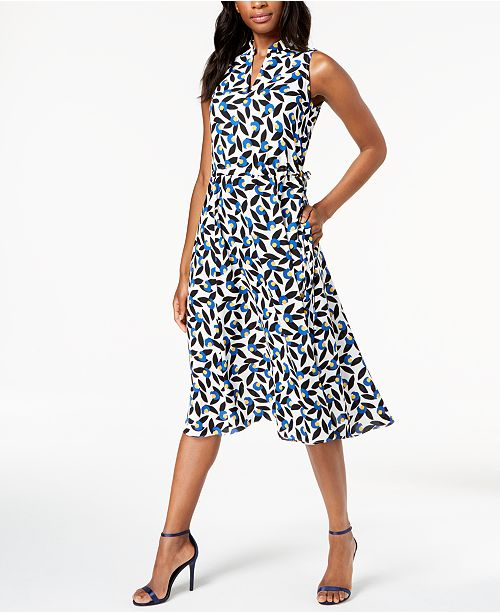

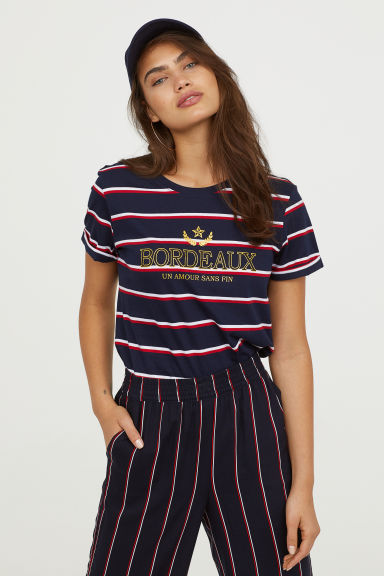

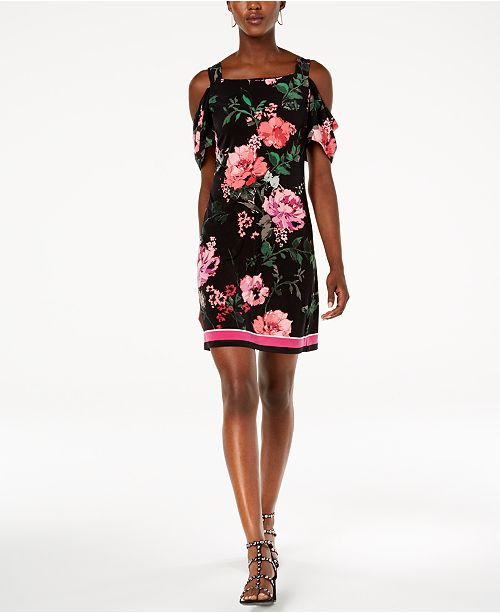

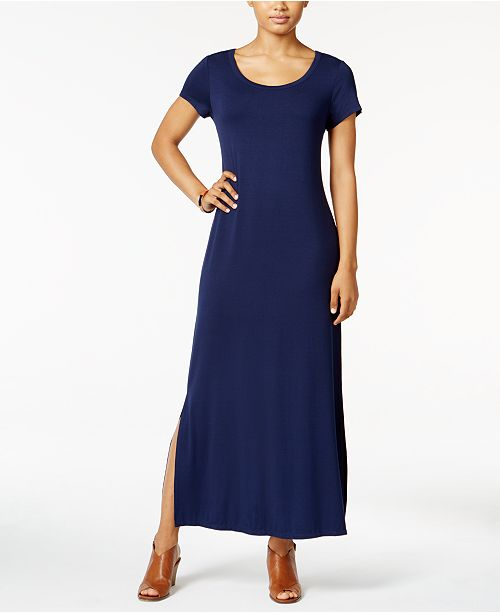

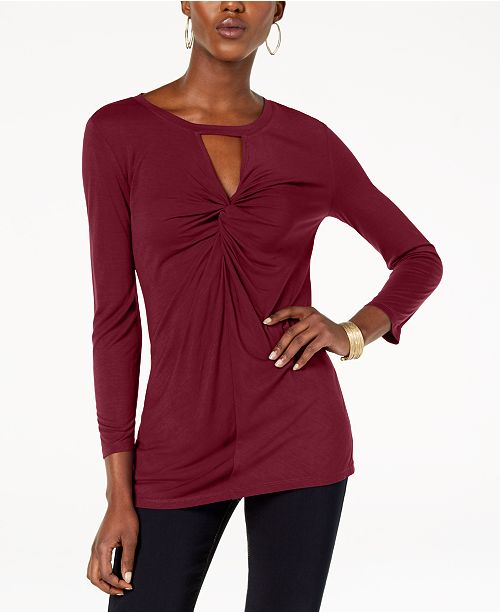

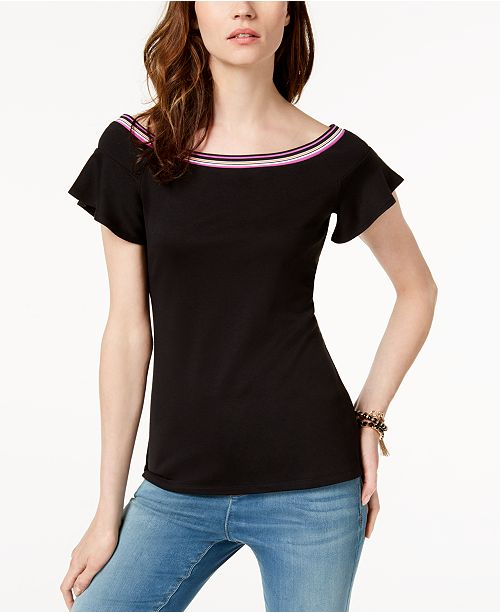

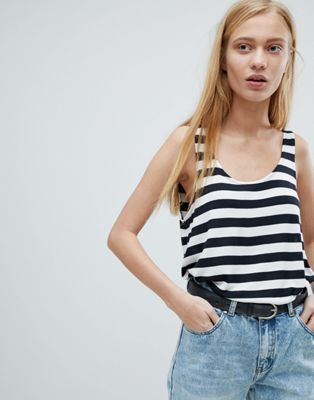

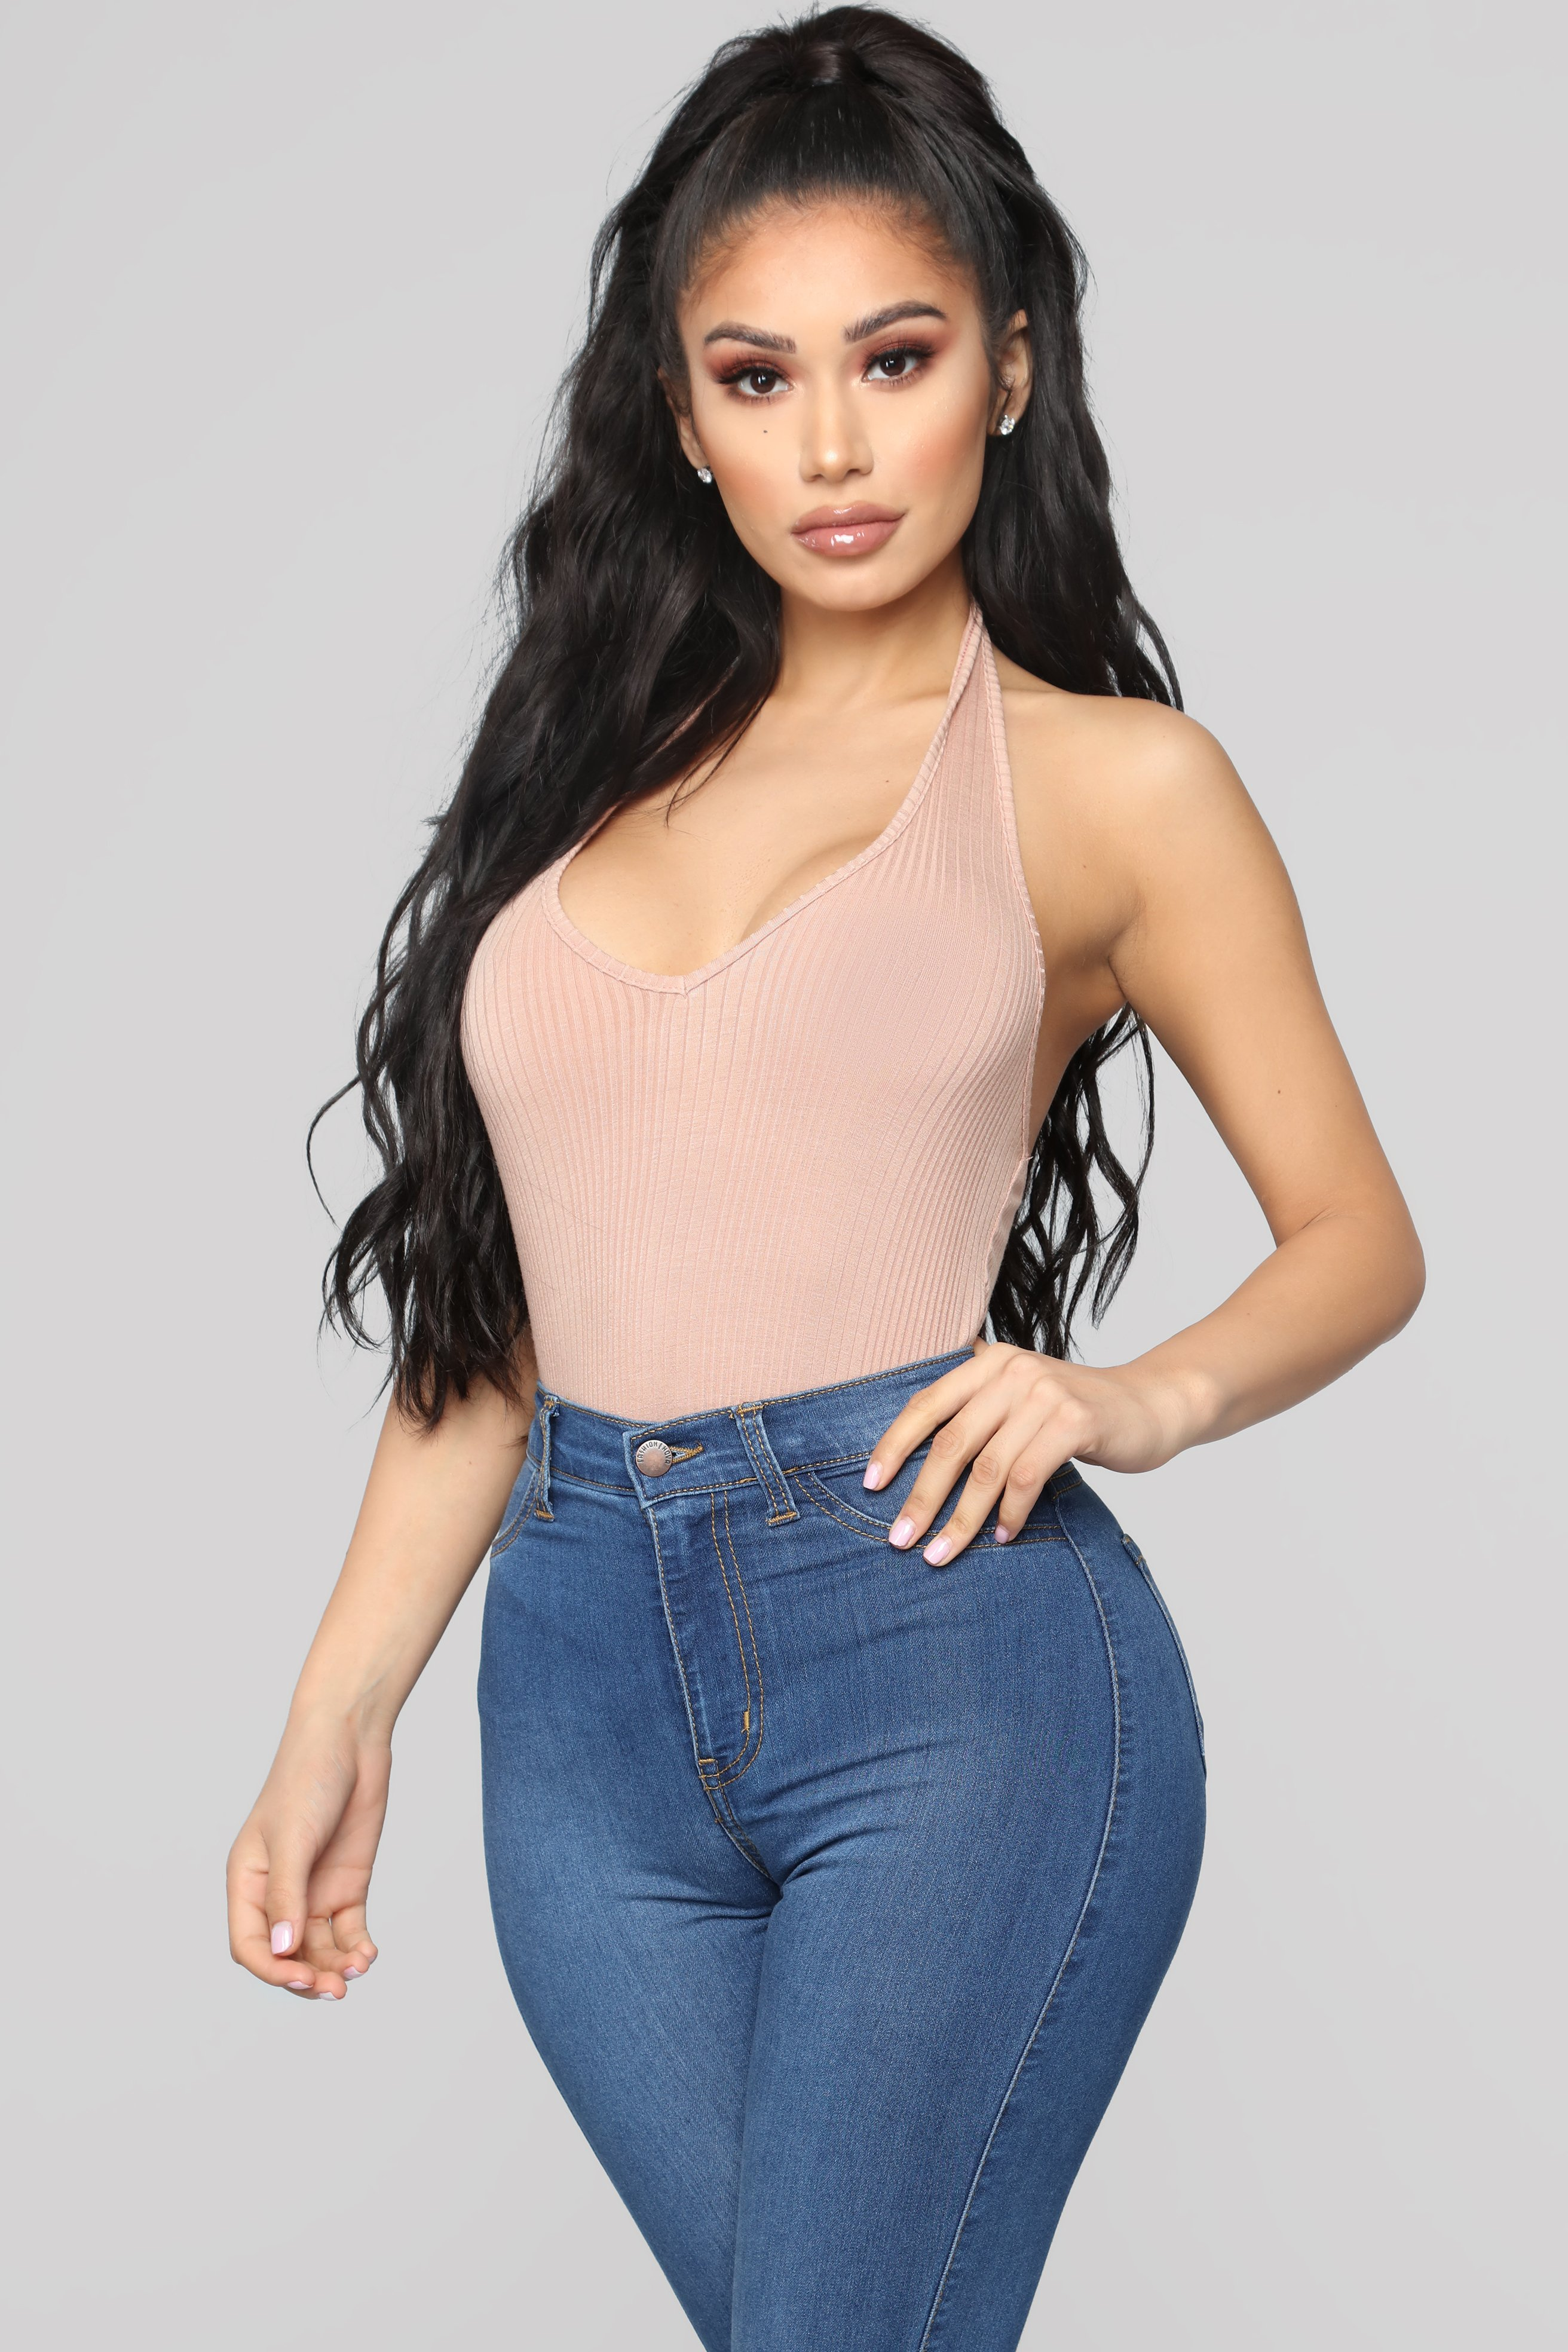

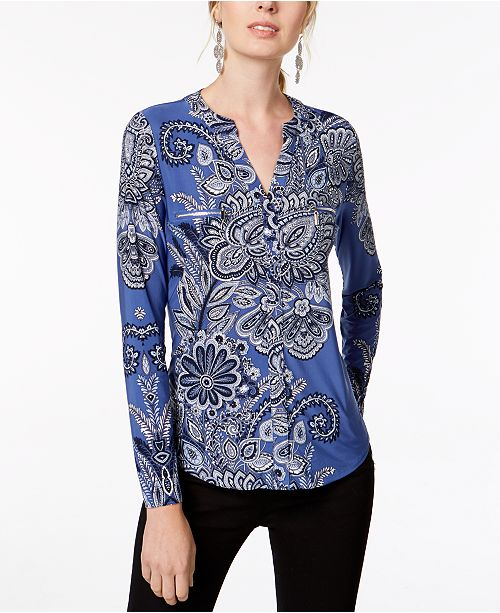

##################################################
group number : 1
##################################################


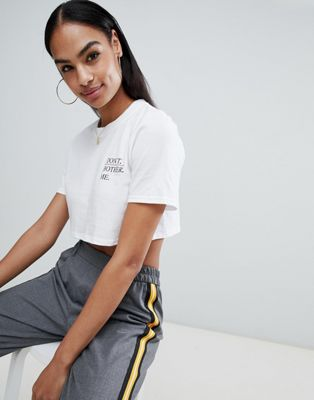

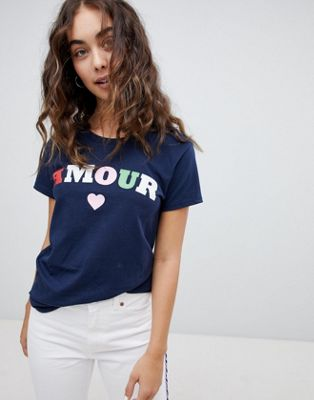

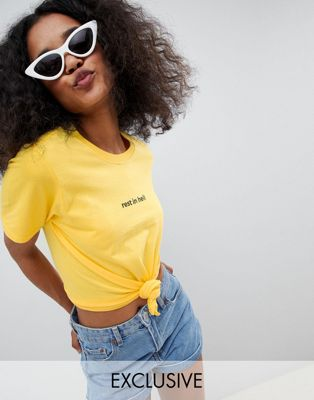

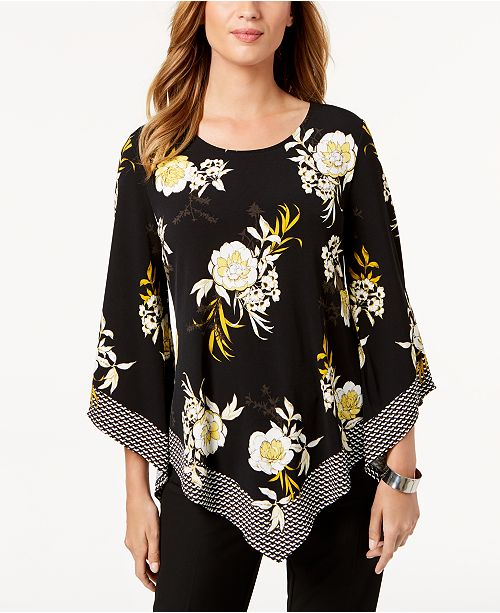

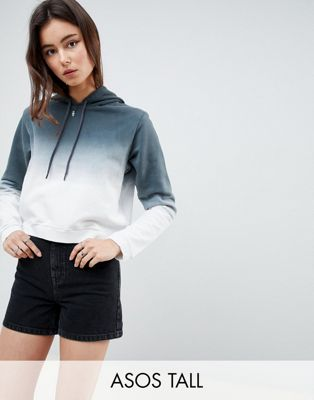

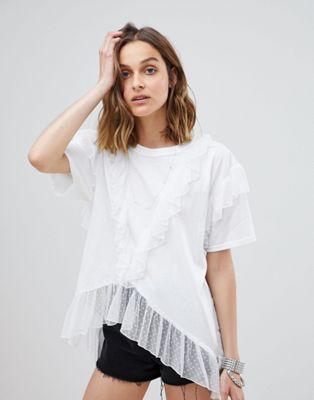

##################################################
group number : 2
##################################################


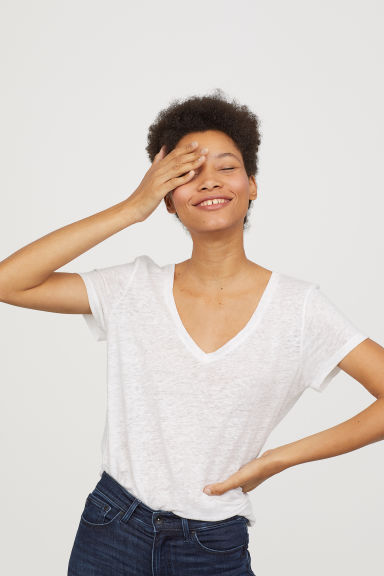

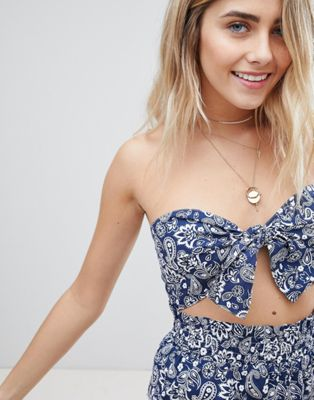

In [31]:
groupPic(df_all2.sample(50), lda_md2, dict_)